In [ ]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

train_dir = '../data/cat_dog_small/train'
validation_dir = '../data/cat_dog_small/validation'

# ImageDataGenerator 생성
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    classes=['cats', 'dogs'],
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,               
    classes=['cats', 'dogs'], 
    target_size=(150,150),   
    batch_size=20,            
    class_mode='binary'
)

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), 
                 activation='relu', input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), 
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), 
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), 
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(units=512, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(units=1, activation='sigmoid'))

model.summary()

model.compile(optimizer=Adam(learning_rate=1e-3), 
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
# steps_per_epoch : 몇번 뽑아야 1 epoch이 되는가
history = model.fit(train_generator, steps_per_epoch=100, epochs=30, 
                    validation_data=validation_generator,
                    validation_steps=50)

In [ ]:
# 학습이 종료된 후 모델을 저장 하기
model.save('../data/cat_dog_small/cat_god_small_cnn_tf2.4.h5')

In [ ]:
# history 객체 확인
print(history.history.keys())

train_acc = history.history['accuracy']
validation_acc = history.history['val_accuracy']

train_loss = history.history['loss']
validation_loss = history.history['val_loss']

plt.plot(train_acc, color='r', label='training')
plt.plot(validation_acc, color='b', label='validation')
plt.legend()
plt.show()

In [ ]:
plt.plot(train_loss, color='r', label='training')
plt.plot(validation_loss, color='b', label='validation')
plt.legend()
plt.show()

# 증식을 이용한 코드
- 증식은 train만 validataion은 평가용

In [ ]:
%reset

In [1]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

train_dir = '../data/cat_dog_small/train'
validation_dir = '../data/cat_dog_small/validation'

# ImageDataGenerator 생성
train_datagen = ImageDataGenerator(
    rescale=1/255,                     
    rotation_range=20, 
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=True
)

validation_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    classes=['cats', 'dogs'],
    target_size=(150,150),
    batch_size=100, 
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,               
    classes=['cats', 'dogs'], 
    target_size=(150,150),   
    batch_size=100,            
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), 
                 activation='relu', input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), 
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), 
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=256, kernel_size=(3,3), 
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(units=512, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(units=1, activation='sigmoid'))

model.summary()

model.compile(optimizer=Adam(learning_rate=1e-3), 
              loss='binary_crossentropy',
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 256)       2

In [3]:
# steps_per_epoch : 몇번 뽑아야 1 epoch이 되는가
history = model.fit(train_generator, steps_per_epoch=20, epochs=30, 
                    validation_data=validation_generator,
                    validation_steps=10)

Epoch 1/30
20/20 [==============================] - 12s 623ms/step - loss: 0.6957 - accuracy: 0.4940 - val_loss: 0.6904 - val_accuracy: 0.5340
Epoch 2/30
20/20 [==============================] - 13s 638ms/step - loss: 0.6839 - accuracy: 0.5530 - val_loss: 0.6481 - val_accuracy: 0.6400
Epoch 3/30
20/20 [==============================] - 13s 627ms/step - loss: 0.6480 - accuracy: 0.6190 - val_loss: 0.6246 - val_accuracy: 0.6440
Epoch 4/30
20/20 [==============================] - 13s 626ms/step - loss: 0.6327 - accuracy: 0.6455 - val_loss: 0.6192 - val_accuracy: 0.6550
Epoch 5/30
20/20 [==============================] - 13s 627ms/step - loss: 0.6023 - accuracy: 0.6730 - val_loss: 0.6002 - val_accuracy: 0.6780
Epoch 6/30
20/20 [==============================] - 13s 626ms/step - loss: 0.6293 - accuracy: 0.6435 - val_loss: 0.6323 - val_accuracy: 0.6090
Epoch 7/30
20/20 [==============================] - 13s 626ms/step - loss: 0.6113 - accuracy: 0.6615 - val_loss: 0.6045 - val_accuracy: 0.6850

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


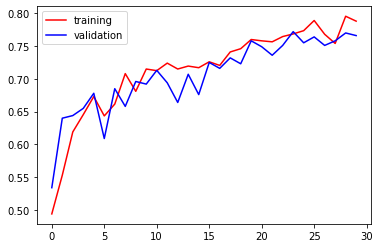

In [4]:
# history 객체 확인
print(history.history.keys())

train_acc = history.history['accuracy']
validation_acc = history.history['val_accuracy']

train_loss = history.history['loss']
validation_loss = history.history['val_loss']

plt.plot(train_acc, color='r', label='training')
plt.plot(validation_acc, color='b', label='validation')
plt.legend()
plt.show()

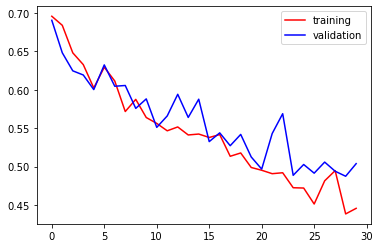

In [5]:
plt.plot(train_loss, color='r', label='training')
plt.plot(validation_loss, color='b', label='validation')
plt.legend()
plt.show()